Variables affecting the case count:
1. Holidays: We can make it categorical for weekends, festivals, gazetted holiday etc.
2. Month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_1 = pd.read_csv("train_fwYjLYX.csv")

In [3]:
df = pd.DataFrame(file_1)

In [19]:
df.head(20)

,segment,branch_id,state,zone,case_count,Year,Month,Weekday_Name
application_date,,,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,Apr,Saturday
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,Apr,Monday
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,Apr,Tuesday
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,Apr,Wednesday
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,Apr,Friday
2017-04-12,1,1.0,WEST BENGAL,EAST,123.0,2017,Apr,Wednesday
2017-04-13,1,1.0,WEST BENGAL,EAST,81.0,2017,Apr,Thursday
2017-04-14,1,1.0,WEST BENGAL,EAST,117.0,2017,Apr,Friday
2017-04-15,1,1.0,WEST BENGAL,EAST,127.0,2017,Apr,Saturday


In [5]:
df.tail()

,application_date,segment,branch_id,state,zone,case_count
80397,2019-07-19,2,NaN,WEST BENGAL,NaN,1886.0
80398,2019-07-20,2,NaN,WEST BENGAL,NaN,1480.0
80399,2019-07-21,2,NaN,WEST BENGAL,NaN,1028.0
80400,2019-07-22,2,NaN,WEST BENGAL,NaN,1946.0
80401,2019-07-23,2,NaN,WEST BENGAL,NaN,1984.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [7]:
df.segment.value_counts()

1    66898
2    13504
Name: segment, dtype: int64

In [8]:
df['application_date'] =  pd.to_datetime(df['application_date'])

In [9]:
#df.application_date = df.application_date.apply(pd.to_datetime)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null datetime64[ns]
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [11]:
df['Year'] = df.application_date.dt.year
df['Month'] = df.application_date.dt.month
df['Weekday_Name'] = df.application_date.dt.weekday_name

In [12]:
df.set_index('application_date', inplace=True)

In [13]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [14]:
df.head()

,segment,branch_id,state,zone,case_count,Year,Month,Weekday_Name
application_date,,,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,Apr,Saturday
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,Apr,Monday
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,Apr,Tuesday
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,Apr,Wednesday
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,Apr,Friday


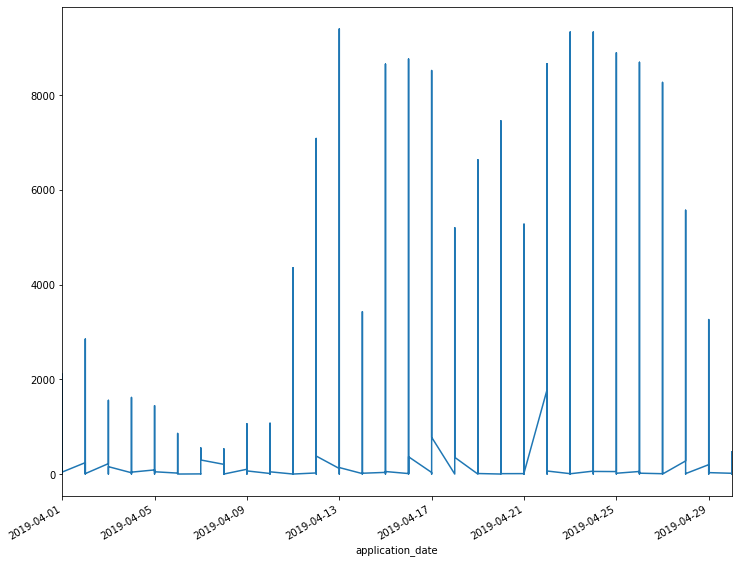

In [15]:
plt.figure(figsize=[12,10])
df.case_count.loc['2019-04'].plot()

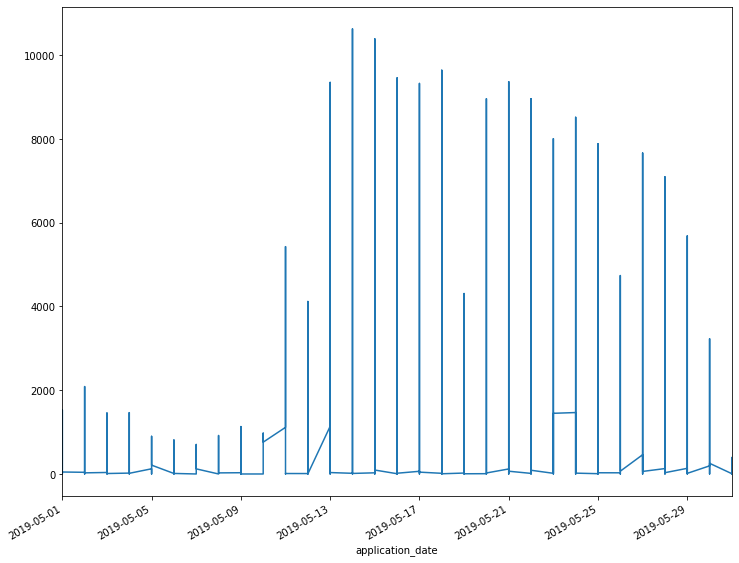

In [16]:
plt.figure(figsize=[12,10])
df.case_count.loc['2019-05'].plot()

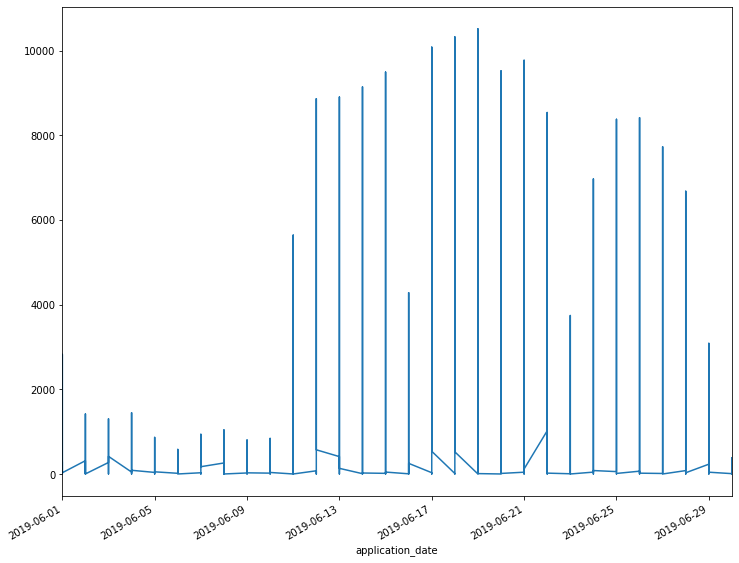

In [17]:
plt.figure(figsize=[12,10])
df.case_count.loc['2019-06'].plot()

In [18]:
df.groupby(['segment','Weekday_Name'])['case_count'].sum()

segment  Weekday_Name
1        Friday           321959.0
         Monday           373605.0
         Saturday         285050.0
         Sunday           177583.0
         Thursday         332452.0
         Tuesday          322809.0
         Wednesday        374582.0
2        Friday          1940178.0
         Monday          1799817.0
         Saturday        1850353.0
         Sunday          1259064.0
         Thursday        1977739.0
         Tuesday         1958186.0
         Wednesday       1939734.0
Name: case_count, dtype: float64

In [23]:
df.sort_index().head(20)

,segment,branch_id,state,zone,case_count,Year,Month,Weekday_Name
application_date,,,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,Apr,Saturday
2017-04-01,1,62.0,PUNJAB,NORTH,2.0,2017,Apr,Saturday
2017-04-01,1,63.0,JHARKHAND,SOUTH,6.0,2017,Apr,Saturday
2017-04-01,1,64.0,KARNATAKA,SOUTH,0.0,2017,Apr,Saturday
2017-04-01,1,65.0,ASSAM,EAST,12.0,2017,Apr,Saturday
2017-04-01,1,66.0,ANDHRA PRADESH,SOUTH,0.0,2017,Apr,Saturday
2017-04-01,2,NaN,TAMIL NADU,NaN,458.0,2017,Apr,Saturday
2017-04-01,1,67.0,GUJARAT,WEST,8.0,2017,Apr,Saturday
2017-04-01,1,68.0,GUJARAT,WEST,1.0,2017,Apr,Saturday


In [30]:
df_1 = df[df.segment == 1]

In [34]:
df_2 = df[df.segment == 2]

In [33]:
df_1[(df_1.state == 'WEST BENGAL')].sort_index().head(20)

,segment,branch_id,state,zone,case_count,Year,Month,Weekday_Name
application_date,,,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,Apr,Saturday
2017-04-01,1,29.0,WEST BENGAL,EAST,0.0,2017,Apr,Saturday
2017-04-01,1,7.0,WEST BENGAL,EAST,2.0,2017,Apr,Saturday
2017-04-01,1,42.0,WEST BENGAL,EAST,2.0,2017,Apr,Saturday
2017-04-01,1,10.0,WEST BENGAL,EAST,0.0,2017,Apr,Saturday
2017-04-01,1,9.0,WEST BENGAL,EAST,11.0,2017,Apr,Saturday
2017-04-01,1,8.0,WEST BENGAL,EAST,13.0,2017,Apr,Saturday
2017-04-01,1,11.0,WEST BENGAL,EAST,9.0,2017,Apr,Saturday
2017-04-03,1,29.0,WEST BENGAL,EAST,0.0,2017,Apr,Monday


In [ ]:
df.loc[]

In [35]:
df_2[(df_2.state == 'WEST BENGAL')].sort_index().head(20)

,segment,branch_id,state,zone,case_count,Year,Month,Weekday_Name
application_date,,,,,,,,
2017-04-01,2,NaN,WEST BENGAL,NaN,43.0,2017,Apr,Saturday
2017-04-02,2,NaN,WEST BENGAL,NaN,116.0,2017,Apr,Sunday
2017-04-03,2,NaN,WEST BENGAL,NaN,178.0,2017,Apr,Monday
2017-04-04,2,NaN,WEST BENGAL,NaN,323.0,2017,Apr,Tuesday
2017-04-05,2,NaN,WEST BENGAL,NaN,443.0,2017,Apr,Wednesday
2017-04-06,2,NaN,WEST BENGAL,NaN,512.0,2017,Apr,Thursday
2017-04-07,2,NaN,WEST BENGAL,NaN,384.0,2017,Apr,Friday
2017-04-08,2,NaN,WEST BENGAL,NaN,631.0,2017,Apr,Saturday
2017-04-09,2,NaN,WEST BENGAL,NaN,458.0,2017,Apr,Sunday


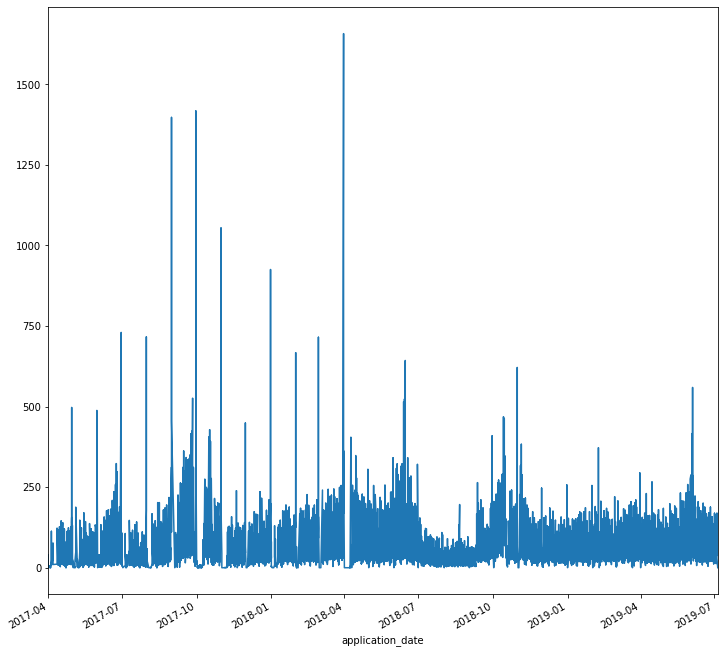

In [55]:
plt.figure(figsize=[12,12])
df_1[df_1.state == 'WEST BENGAL'].case_count.plot()